In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
from scipy import stats
from scipy.stats import chisquare, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import pickle
%matplotlib inline

In [2]:
df = pd.read_pickle('../data/interim/train_clean.pickle')
df.head()

,ProductName,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,AvSigVersion_extracted,AppVersion_extracted,EngineVersion_extracted,OsVer_encoded,Census_OSBranch_release_extracted,IsProtected_encoded,RAM_bins
0,win8defender,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,...,0,10.0,0,273,18,15100,10.0,rs4_release,2,4-8 GB
1,win8defender,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,...,0,8.0,0,263,13,14600,10.0,rs4_release,2,4-8 GB
2,win8defender,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,...,0,3.0,0,273,18,15100,10.0,rs4_release,2,4-8 GB
3,win8defender,7.0,0,53447.0,1.0,1.0,1,88,20710.0,NaN,...,0,3.0,1,273,18,15100,10.0,rs4_release,2,4-8 GB
4,win8defender,7.0,0,53447.0,1.0,1.0,1,18,37376.0,NaN,...,0,1.0,1,273,18,15100,10.0,rs4_release,2,4-8 GB


In [3]:
df.shape

(8921483, 72)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 72 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   ProductName                                        category
 1   RtpStateBitfield                                   category
 2   IsSxsPassiveMode                                   Int64   
 3   AVProductStatesIdentifier                          category
 4   AVProductsInstalled                                category
 5   AVProductsEnabled                                  category
 6   HasTpm                                             Int64   
 7   CountryIdentifier                                  category
 8   CityIdentifier                                     category
 9   OrganizationIdentifier                             category
 10  GeoNameIdentifier                                  category
 11  LocaleEnglishNameIdentifier          

In [5]:
cat_col = df.select_dtypes('category').columns.tolist()
binary_col = df.select_dtypes('Int64').columns.tolist()
num_col = [col for col in df.columns 
           if col not in cat_col
           if col not in binary_col]

## Numerical data

**Univariate Analysis**

In [6]:
df[num_col].head(10)

,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges
0,4.0,476940.0,299451.0,4096.0,18.900000,1440.0,900.0,4.294967e+09
1,4.0,476940.0,102385.0,4096.0,13.900000,1366.0,768.0,1.000000e+00
2,4.0,114473.0,113907.0,4096.0,21.500000,1920.0,1080.0,4.294967e+09
3,4.0,238475.0,227116.0,4096.0,18.500000,1366.0,768.0,4.294967e+09
4,4.0,476940.0,101900.0,6144.0,14.000000,1366.0,768.0,0.000000e+00
5,2.0,114473.0,113671.0,8192.0,21.500000,1920.0,1080.0,4.294967e+09
6,2.0,476940.0,458702.0,4096.0,17.200001,1600.0,900.0,0.000000e+00
7,2.0,305245.0,290807.0,4096.0,15.500000,1366.0,768.0,0.000000e+00
8,4.0,305245.0,303892.0,4096.0,15.600000,1920.0,1080.0,0.000000e+00
9,4.0,953869.0,203252.0,8192.0,15.500000,1366.0,768.0,0.000000e+00


In [7]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Census_ProcessorCoreCount,8880177.0,3.989696e+00,2.082553e+00,1.0,2.0,4.0,4.000000e+00,1.920000e+02
Census_PrimaryDiskTotalCapacity,8868431.0,5.129776e+05,3.564779e+05,0.0,239372.0,476940.0,9.538690e+05,1.526074e+07
Census_SystemVolumeTotalCapacity,8864221.0,3.761297e+05,3.187795e+05,0.0,120775.0,249497.0,4.759700e+05,2.000000e+06
Census_TotalPhysicalRAM,8840950.0,6.115257e+03,5.115821e+03,255.0,4096.0,4096.0,8.192000e+03,1.572864e+06
Census_InternalPrimaryDiagonalDisplaySizeInInches,8874349.0,1.667620e+01,5.892932e+00,0.7,13.9,15.5,1.720000e+01,1.823000e+02
Census_InternalPrimaryDisplayResolutionHorizontal,8874341.0,1.547743e+03,3.683176e+02,144.0,1366.0,1366.0,1.920000e+03,1.228800e+04
Census_InternalPrimaryDisplayResolutionVertical,8874341.0,8.975861e+02,2.145927e+02,171.0,768.0,768.0,1.080000e+03,8.640000e+03
Census_InternalBatteryNumberOfCharges,8652728.0,1.123782e+09,1.887782e+09,0.0,0.0,0.0,4.294967e+09,4.294967e+09


Census_InternalPrimaryDiagonalDisplaySizeInInches is continuous, the other variables are discrete, however we may treat them as continuous given the number of counts and dimension of dataset.

**Census_InternalPrimaryDiagonalDisplaySizeInInches**

In [8]:
def cont_var_subplots(var_name, df, xlabel, figsize=(16, 6)):
    
    """
    Plots the boxplot and histogram of var_name (string)
    in a pandas df and sets the x label to xlabel (string).
    """
    
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    sns.boxplot(ax=axes[0], x=var_name, data=df)
    axes[0].set_xlabel('')
    sns.histplot(ax=axes[1], x=var_name, data=df, bins=100)
    axes[1].set_xlabel(xlabel)
    plt.tight_layout()

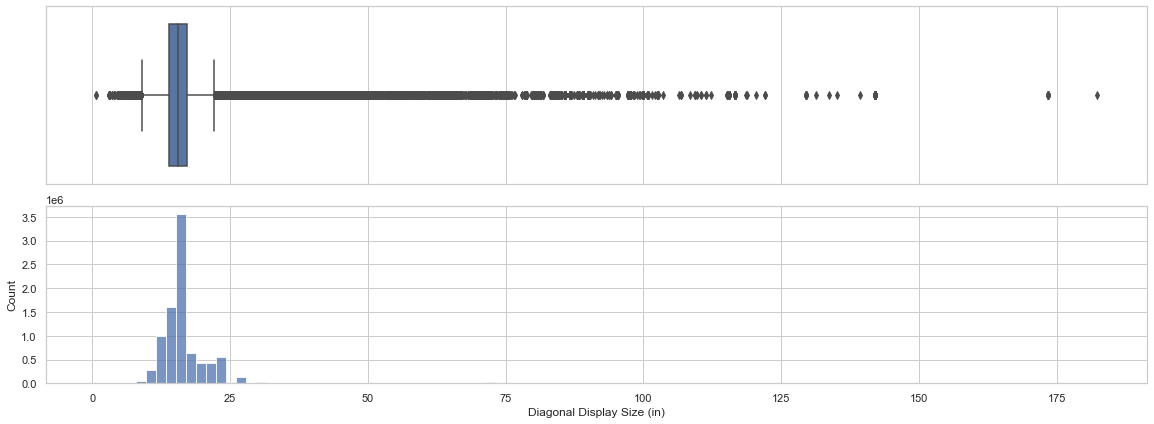

In [9]:
cont_var_subplots('Census_InternalPrimaryDiagonalDisplaySizeInInches', df, 'Diagonal Display Size (in)')

Outlier will be removed based on Z-score.

In [10]:
outlier_list = ['Census_InternalPrimaryDiagonalDisplaySizeInInches']

**Census_ProcessorCoreCount**

In [11]:
df['Census_ProcessorCoreCount'].nunique()

45

In [12]:
CoreCount_prob = pd.DataFrame(df['Census_ProcessorCoreCount'].value_counts(normalize=True)).reset_index()    
CoreCount_prob.columns = ['Core', 'Probability']
CoreCount_HasDetections_prob = df.groupby('Census_ProcessorCoreCount')['HasDetections'].mean().reset_index()
CoreCount_HasDetections_prob.columns = ['Core', 'HasDetections']
CoreCount_HasDetections_prob.head()

CoreCount_prob = CoreCount_prob.merge(CoreCount_HasDetections_prob,  
                     left_on='Core',
                     right_on='Core')
CoreCount_prob.Core = CoreCount_prob.Core.astype('int')

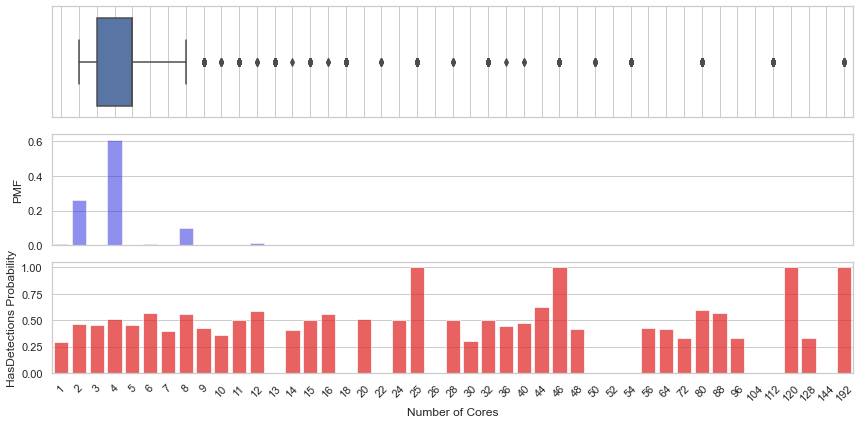

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

sns.boxplot(ax=axes[0],
             x='Census_ProcessorCoreCount', 
             data=df)
axes[0].set_xlabel('');

sns.barplot(ax=axes[1],
            x='Core', 
            y='Probability',
            data=CoreCount_prob,
            color='blue',
            alpha=0.5)
axes[1].set_xlabel('')
axes[1].set_ylabel('PMF')

sns.barplot(ax=axes[2],
            x='Core', 
            y='HasDetections',
            data=CoreCount_prob,
            color='red',
            alpha=0.7)
axes[2].set_xlabel('Number of Cores');
axes[2].set_ylabel('HasDetections Probability')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='center')
plt.tight_layout()

Very few machines have more than 8 cores, while the mode is 4. Extreme probabilities of detections are due to variability. I'll treat this as categorical and do roll up to reduce cardinality.

In [14]:
df['Census_ProcessorCoreCount'].nunique()

45

In [15]:
df['Census_ProcessorCoreCount'].value_counts().iloc[:20]

4.0     5430193
2.0     2311969
8.0      865004
12.0      92702
1.0       70390
6.0       69910
16.0      18551
3.0       13580
32.0       2136
24.0       1847
20.0       1781
40.0        506
36.0        287
28.0        271
48.0        235
5.0         216
56.0        132
10.0         98
64.0         93
7.0          92
Name: Census_ProcessorCoreCount, dtype: int64

In [16]:
df.loc[(df['Census_ProcessorCoreCount'] != 4) &
       (df['Census_ProcessorCoreCount'] != 2) &
       (df['Census_ProcessorCoreCount'] != 8) &
       (df['Census_ProcessorCoreCount'] != 12) & 
       (df['Census_ProcessorCoreCount'] != 1) &
       (df['Census_ProcessorCoreCount'] != 6) &
       (df['Census_ProcessorCoreCount'] != 16), 
       'Census_ProcessorCoreCount'] = 'Other'

In [17]:
df['Census_ProcessorCoreCount'].value_counts()

4.0      5430193
2.0      2311969
8.0       865004
12.0       92702
1.0        70390
6.0        69910
Other      62764
16.0       18551
Name: Census_ProcessorCoreCount, dtype: int64

In [18]:
df['Census_ProcessorCoreCount'] = df['Census_ProcessorCoreCount'].astype('category')

**Census_PrimaryDiskTotalCapacity**

In [19]:
df.Census_PrimaryDiskTotalCapacity.nunique()

5707

In [20]:
df.Census_PrimaryDiskTotalCapacity.value_counts().iloc[:30]

476940.0     2841530
953869.0     2175780
305245.0      474616
122104.0      469060
244198.0      452284
238475.0      312093
29820.0       303493
114473.0      259542
715404.0      245946
228936.0      159491
152627.0      117362
1907729.0      98160
488386.0       96985
59640.0        95669
29824.0        88731
610480.0       84850
29600.0        43855
76319.0        27882
457862.0       25321
59648.0        21240
119276.0       19967
114480.0       18888
61057.0        18379
239372.0       16983
29184.0        16183
476938.0       15611
228944.0       15259
115712.0       14021
57241.0        12829
61440.0        12358
Name: Census_PrimaryDiskTotalCapacity, dtype: int64

I will treat this as a continuous variable.

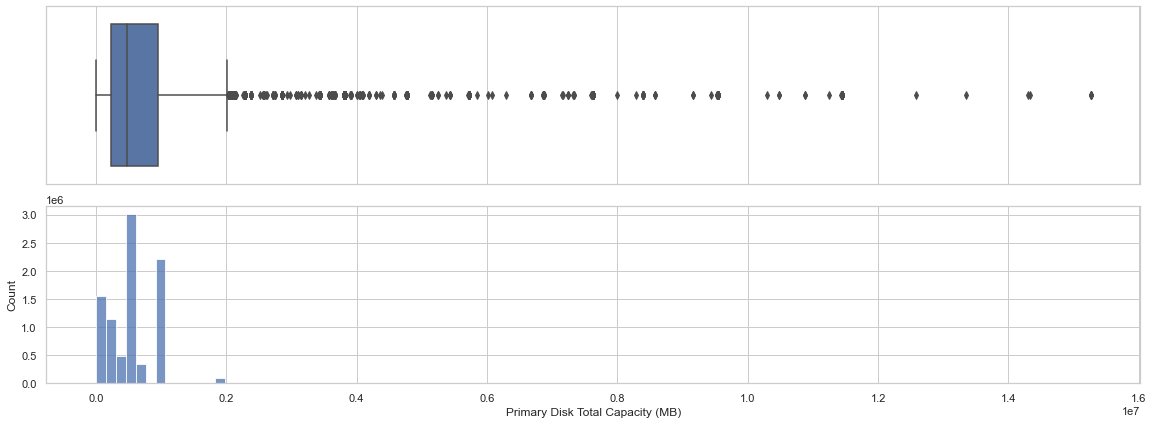

In [21]:
cont_var_subplots('Census_PrimaryDiskTotalCapacity', df, 'Primary Disk Total Capacity (MB)')

Outlier will be removed based on Z-score.

In [22]:
outlier_list.append('Census_PrimaryDiskTotalCapacity') 

**Census_SystemVolumeTotalCapacity**

In [23]:
df.Census_SystemVolumeTotalCapacity.nunique()

535313

In [24]:
df.Census_SystemVolumeTotalCapacity.value_counts().iloc[:30]

28542.0     51998
926992.0    50430
476389.0    44435
953253.0    41572
102400.0    41257
476324.0    40925
952728.0    38251
476323.0    35410
475799.0    33723
952727.0    33714
952792.0    32698
28558.0     31740
476438.0    30906
243582.0    28784
476373.0    27279
380772.0    26999
476388.0    26770
381546.0    26688
121488.0    26600
190001.0    26059
953318.0    25690
113922.0    25621
190774.0    25189
113857.0    23288
29043.0     23084
102401.0    21876
99500.0     21319
953093.0    21064
953302.0    20782
28557.0     20699
Name: Census_SystemVolumeTotalCapacity, dtype: int64

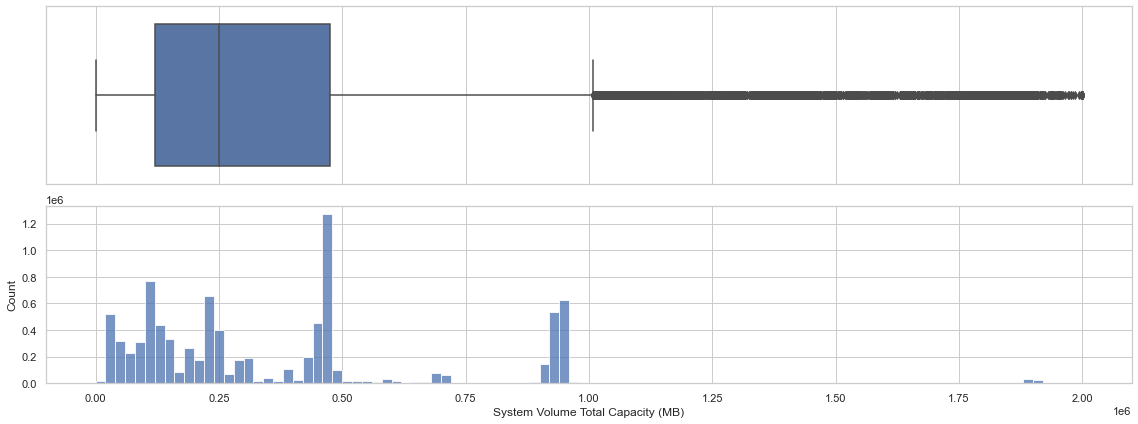

In [25]:
cont_var_subplots('Census_SystemVolumeTotalCapacity', df, 'System Volume Total Capacity (MB)')

I will treat this as a continuous variable.

Outlier will be removed based on Z-score.

In [26]:
outlier_list.append('Census_SystemVolumeTotalCapacity') 

**Census_TotalPhysicalRAM**

In [27]:
df.Census_TotalPhysicalRAM.nunique()

3446

In [28]:
df.Census_TotalPhysicalRAM.value_counts().iloc[:30]

4096.0      4094512
8192.0      2196505
2048.0      1097474
16384.0      531558
6144.0       398671
12288.0      159894
3072.0       152070
1024.0        66054
32768.0       58107
24576.0       11572
10240.0       10579
5120.0         7393
65536.0        6606
1536.0         4905
2560.0         4316
4095.0         4106
20480.0        3960
2047.0         3814
8191.0         1706
14336.0        1513
7168.0         1425
49152.0        1028
131072.0        936
3071.0          780
3584.0          714
18432.0         600
9216.0          551
6143.0          350
28672.0         317
3583.0          313
Name: Census_TotalPhysicalRAM, dtype: int64

I will treat this as a continuous variable.

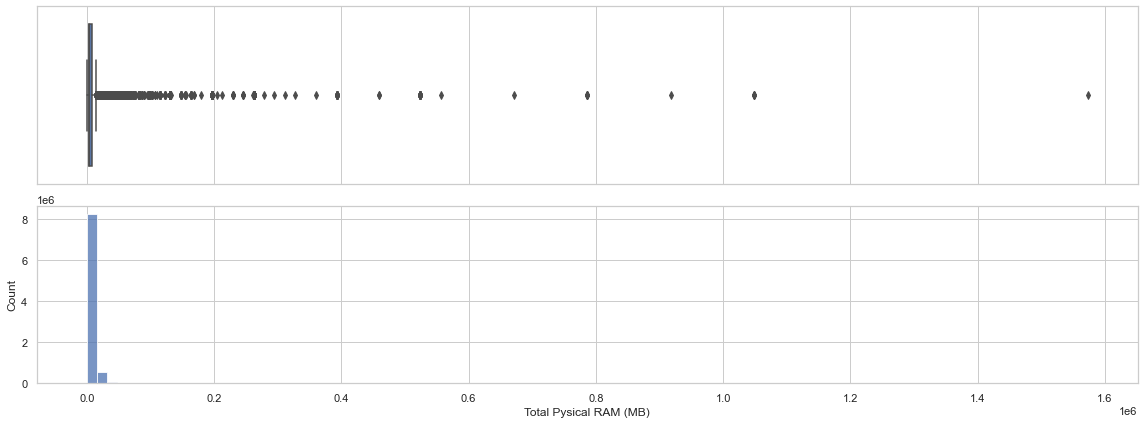

In [29]:
cont_var_subplots('Census_TotalPhysicalRAM', df, 'Total Pysical RAM (MB)')

Outlier will be removed based on Z-score.

In [30]:
outlier_list.append('Census_TotalPhysicalRAM')

**Census_InternalPrimaryDisplayResolutionHorizontal**

In [31]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.nunique()

2179

In [32]:
df.Census_InternalPrimaryDisplayResolutionHorizontal.value_counts().iloc[:30]

1366.0    4515064
1920.0    2220648
1280.0     527430
1600.0     501288
1024.0     342620
1440.0     167131
1360.0     128010
1680.0     109716
2560.0      70120
2736.0      57640
3840.0      44668
800.0       31940
2160.0      31667
3200.0      17335
3000.0      11071
2880.0      10107
640.0        8796
1368.0       8398
1152.0       7784
2256.0       5470
3440.0       5269
2048.0       5028
1400.0       4263
1200.0       3484
1080.0       3288
768.0        3159
1768.0       2004
2304.0       1969
4096.0       1930
1800.0       1777
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: int64

I will treat this as a continuous variable.

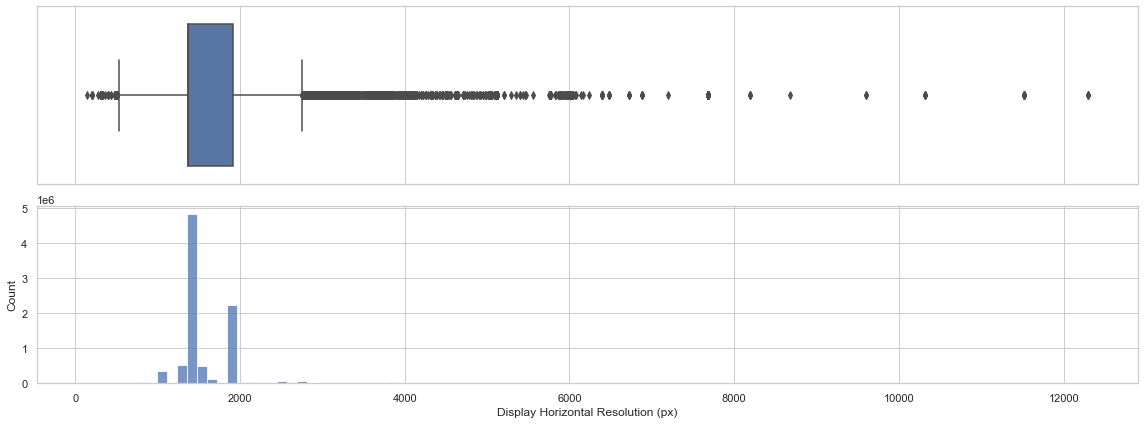

In [33]:
cont_var_subplots('Census_InternalPrimaryDisplayResolutionHorizontal', df, 'Display Horizontal Resolution (px)')

Outlier will be removed based on Z-score.

In [34]:
outlier_list.append('Census_InternalPrimaryDisplayResolutionHorizontal')

**Census_InternalPrimaryDisplayResolutionVertical**

In [35]:
df.Census_InternalPrimaryDisplayResolutionVertical.nunique()

1559

In [36]:
df.Census_InternalPrimaryDisplayResolutionVertical.value_counts().iloc[:30]

768.0     4973621
1080.0    2148402
900.0      655155
800.0      262058
1024.0     186322
1050.0     112220
1440.0      81251
1200.0      79397
600.0       63806
1824.0      57630
720.0       48483
2160.0      46777
1280.0      28870
1800.0      25532
1600.0      16009
2000.0      11066
480.0        8972
1920.0       8143
864.0        7550
960.0        6479
1504.0       5466
1152.0       2529
1536.0       2348
1366.0       2225
992.0        2018
1000.0       1641
2880.0       1588
945.0        1560
2736.0       1089
2100.0       1051
Name: Census_InternalPrimaryDisplayResolutionVertical, dtype: int64

I will treat this as a continuous variable.

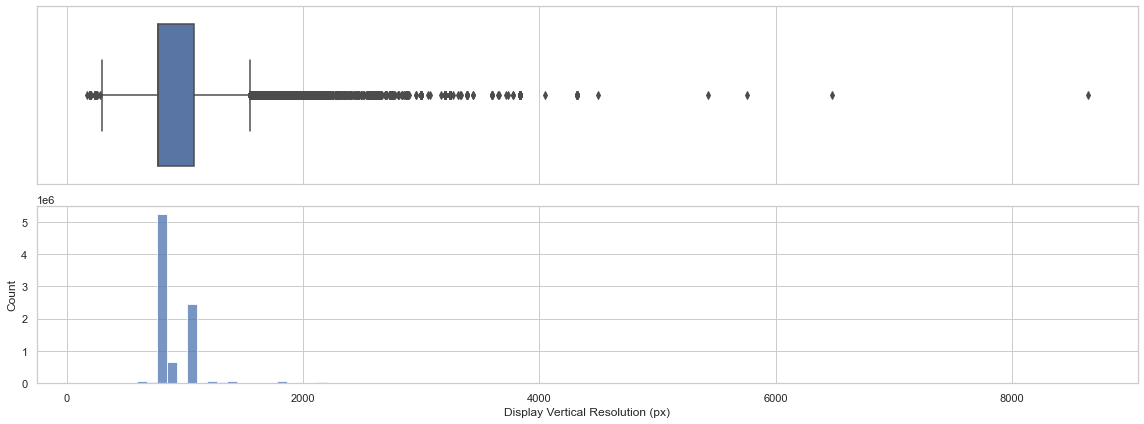

In [37]:
cont_var_subplots('Census_InternalPrimaryDisplayResolutionVertical', df, 'Display Vertical Resolution (px)')

Outlier will be removed based on Z-score.

In [38]:
outlier_list.append('Census_InternalPrimaryDisplayResolutionVertical')

**Census_InternalBatteryNumberOfCharges**

In [39]:
df.Census_InternalBatteryNumberOfCharges.nunique()

41087

In [40]:
df.Census_InternalBatteryNumberOfCharges.value_counts(normalize=True).iloc[:30]

0.000000e+00    0.584024
4.294967e+09    0.261651
1.000000e+00    0.006219
2.000000e+00    0.003251
1.600000e+01    0.003161
3.000000e+00    0.002489
3.300000e+01    0.002279
4.000000e+00    0.002083
5.000000e+00    0.001871
6.000000e+00    0.001673
7.000000e+00    0.001561
8.000000e+00    0.001501
9.000000e+00    0.001389
3.740000e+02    0.001344
1.000000e+01    0.001331
1.100000e+01    0.001281
4.380000e+02    0.001237
1.200000e+01    0.001221
1.300000e+01    0.001152
1.400000e+01    0.001133
3.770000e+02    0.001123
1.500000e+01    0.001112
2.560000e+02    0.001107
2.600000e+01    0.001068
1.700000e+01    0.001033
1.800000e+01    0.001019
3.840000e+02    0.001004
1.900000e+01    0.000979
2.000000e+01    0.000962
2.100000e+01    0.000947
Name: Census_InternalBatteryNumberOfCharges, dtype: float64

In [41]:
df.Census_InternalBatteryNumberOfCharges.max()

4294967300.0

<AxesSubplot:>

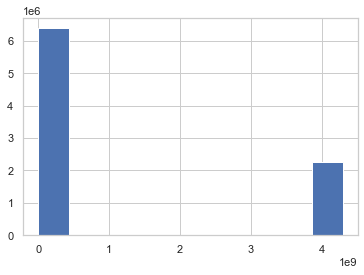

In [42]:
df.Census_InternalBatteryNumberOfCharges.hist()

In [43]:
int_battery_charge_contingency = pd.crosstab(df.Census_InternalBatteryNumberOfCharges, df.HasDetections)
int_battery_charge_contingency

HasDetections,0,1
Census_InternalBatteryNumberOfCharges,,
0.000000e+00,2541587,2511817
1.000000e+00,31203,22607
2.000000e+00,16455,11673
3.000000e+00,12580,8957
4.000000e+00,10615,7405
...,...,...
6.550900e+04,1,0
6.551600e+04,1,0
6.551900e+04,1,0


This might mean som values are missing (0's), others are actual values - even though small numbers like 1, 2, 3 .., and it seems caped to the max value of 4.3e9.

In [44]:
df.loc[df.Census_InternalBatteryNumberOfCharges == 0, 'Census_InternalBatteryNumberOfCharges'] = 0
df.loc[(df.Census_InternalBatteryNumberOfCharges != 0) &
       (df.Census_InternalBatteryNumberOfCharges != df.Census_InternalBatteryNumberOfCharges.max()), 
       'Census_InternalBatteryNumberOfCharges'] = 'Other'
df.Census_InternalBatteryNumberOfCharges = df.Census_InternalBatteryNumberOfCharges.map({0.0:'None',
                                                                                        4294967296.0: 'Max',
                                                                                        'Other':'Other'}).astype('category')
df.Census_InternalBatteryNumberOfCharges.value_counts()

None     5053404
Max      2263993
Other    1604086
Name: Census_InternalBatteryNumberOfCharges, dtype: int64

In [45]:
battery_charge_contingency = pd.crosstab(df.Census_InternalBatteryNumberOfCharges, df.HasDetections)
battery_charge_contingency

HasDetections,0,1
Census_InternalBatteryNumberOfCharges,,
Max,1096688,1167305
None,2541587,2511817
Other,824316,779770


In [46]:
chi2_contingency(battery_charge_contingency)

(3613.54117241781,
 0.0,
 2,
 array([[1132465.84518101, 1131527.15481899],
        [2527749.61402314, 2525654.38597686],
        [ 802375.54079585,  801710.45920415]]))

## Remove outliers

In [47]:
outlier_list

['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical']

In [48]:
z_score = np.abs(stats.zscore(df[outlier_list], nan_policy='omit'))
z_score

array([[0.37736872, 0.10109194, 0.2405385 , 0.39471024, 0.29252398,
        0.0112461 ],
       [0.4711053 , 0.10109194, 0.8587275 , 0.39471024, 0.4934376 ,
        0.60387266],
       [0.81857526, 1.117893  , 0.8225834 , 0.39471024, 1.0106995 ,
        0.85004437],
       ...,
       [0.19959356, 0.7539853 , 0.41765776, 0.4059436 , 1.0106995 ,
        0.85004437],
       [0.67473906, 0.10109194, 0.27403343, 0.39471024, 1.4219843 ,
        0.60387266],
       [0.19959356, 1.2368006 , 0.81873906, 0.00561667, 1.0106995 ,
        0.85004437]], dtype=float32)

In [49]:
outlier_indices = df[outlier_list][z_score > 3].index
outlier_indices

Int64Index([     18,      21,      34,      34,      35,      49,      63,
                 79,      79,      89,
            ...
            8921370, 8921400, 8921405, 8921405, 8921420, 8921425, 8921425,
            8921444, 8921444, 8921476],
           dtype='int64', length=697920)

In [50]:
clean_df = df.iloc[~df.index.isin(outlier_indices), :]
clean_df.shape

(8475427, 72)

In [51]:
cat_col = clean_df.select_dtypes('category').columns.tolist()
binary_col = clean_df.select_dtypes('Int64').columns.tolist()
num_col = [col for col in clean_df.columns 
           if col not in cat_col
           if col not in binary_col]

**Bivariate Analysis**

In [52]:
num_col

['Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical']

<Figure size 432x288 with 0 Axes>

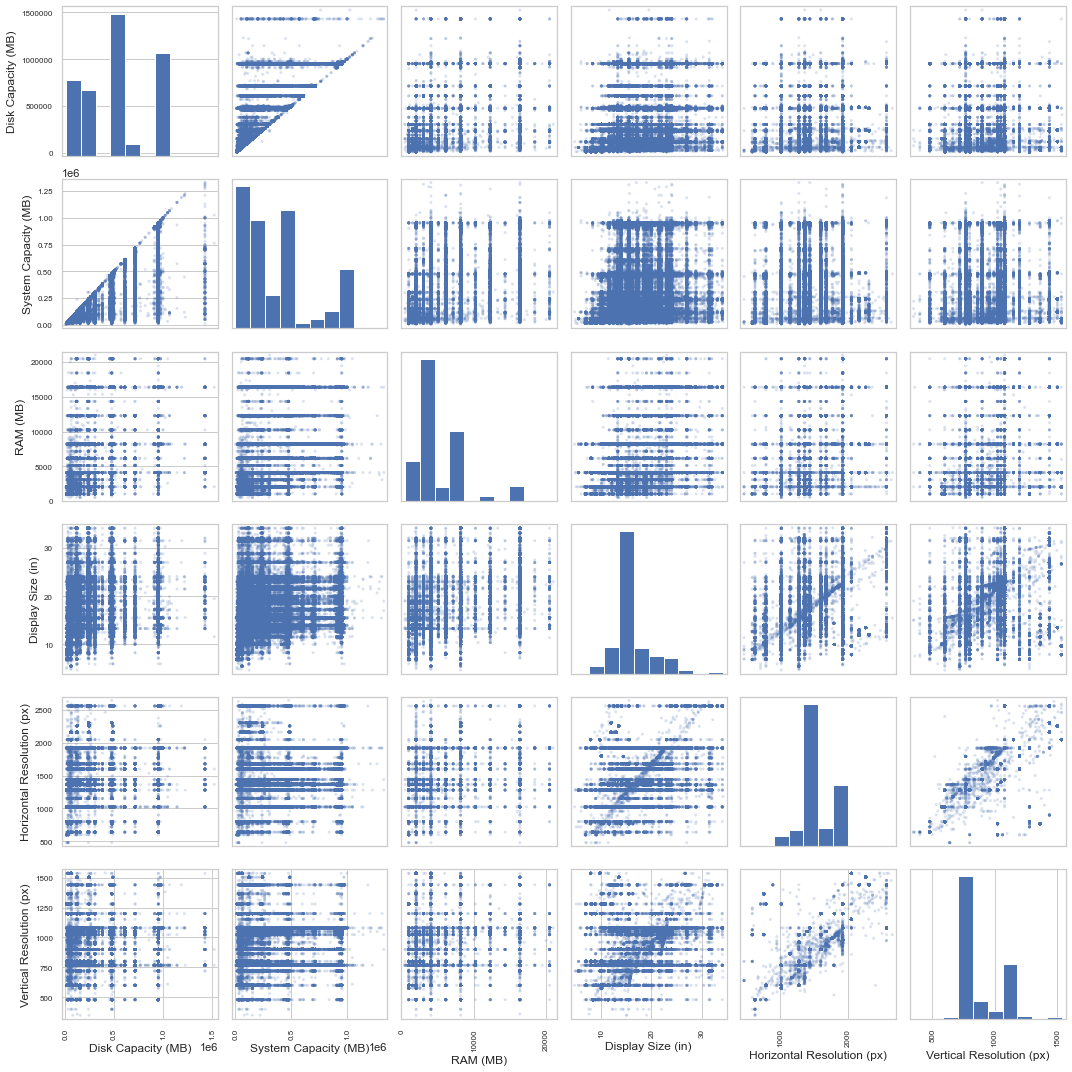

In [57]:
num_col_name_dict = {'Census_PrimaryDiskTotalCapacity':'Disk Capacity (MB)',
                       'Census_SystemVolumeTotalCapacity':'System Capacity (MB)',
                       'Census_TotalPhysicalRAM': 'RAM (MB)',
                       'Census_InternalPrimaryDiagonalDisplaySizeInInches':'Display Size (in)',
                       'Census_InternalPrimaryDisplayResolutionHorizontal':'Horizontal Resolution (px)',
                       'Census_InternalPrimaryDisplayResolutionVertical':'Vertical Resolution (px)'}

df_sample = clean_df[num_col].rename(columns=num_col_name_dict).sample(frac=.1)
plt.figure()
pd.plotting.scatter_matrix(df_sample, alpha=0.2, figsize=(15,15))
plt.subplots_adjust(hspace=.2, wspace=.2)
plt.tight_layout();

<AxesSubplot:>

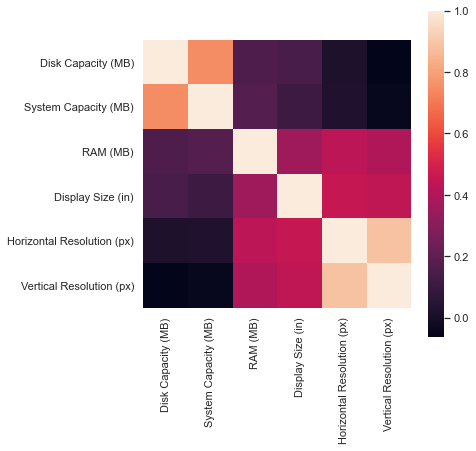

In [58]:
corr_matrix = clean_df[num_col].rename(columns=num_col_name_dict).corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, square=True)

<AxesSubplot:>

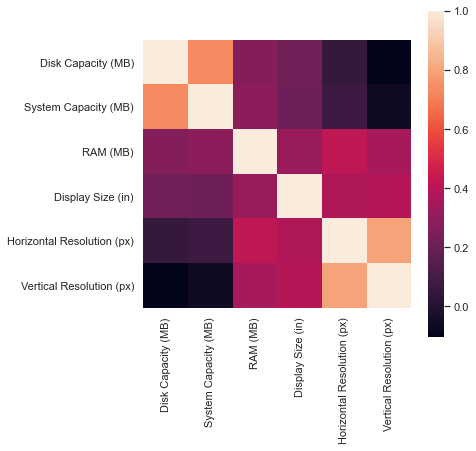

In [59]:
corr_matrix = clean_df[num_col].rename(columns=num_col_name_dict).corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, square=True)

In [56]:
redo for df with outliers and the do
Relationship with target (boxplots and t-test)

SyntaxError: invalid syntax (<ipython-input-56-3b9ccb5b5e25>, line 1)

In [ ]:
sns.countplot(x='Census_ProcessorCoreCount',
            hue='HasDetections',
            data=df,
            color='blue',
            edgecolor=sns.color_palette("dark", 1),
            alpha=0.7)
plt.tight_layout()

Slightly more detections in machines with more cores, may this be because smaller computer are used for simpler tasks whereas computers with more cores are more engaged in risky activities (gaming, downloads, etc)?

In [ ]:
core_count_contingency = pd.crosstab(df['Census_ProcessorCoreCount'], df['HasDetections'])
core_count_contingency

In [ ]:
chi2, pval, dof, exp = chi2_contingency(core_count_contingency)
chi2, pval, dof, exp

In [ ]:
obs = core_count_contingency.values
obs

In [ ]:
diff =  np.square(exp-obs)/exp
sum(sum(diff))

In [ ]:
z = stats.zscore(df['Census_InternalPrimaryDiagonalDisplaySizeInInches'], nan_policy='omit')
z = abs(z)
df['Census_InternalPrimaryDiagonalDisplaySizeInInches_outlier_removed_zscore'] = \
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'][z < 3]

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Census_InternalPrimaryDiagonalDisplaySizeInInches_outlier_removed_zscore',
             hue='HasDetections',
             data=df,
             bins=30,)
plt.xlabel('Diagonal Display Size (in)');

In [ ]:
sns.countplot(x='Census_ProcessorCoreCount',
            hue='HasDetections',
            data=df,
            color='blue',
            alpha=0.5)

Remove outliers based on z scores and then keep both df with outliers and without to test.

In [ ]:
df[binary_col] = df[binary_col].astype('float32')

In [ ]:
x = df['Census_InternalPrimaryDiagonalDisplaySizeInInches']
y = df['HasDetections']
x.corr(y, method='pearson'), x.corr(y, method='spearman')

In [ ]:
x = df['Census_InternalPrimaryDiagonalDisplaySizeInInches_outlier_removed_IQR']
y = df['HasDetections']
x.corr(y, method='pearson'), x.corr(y, method='spearman')

In [ ]:
x = df['Census_InternalPrimaryDiagonalDisplaySizeInInches_outlier_removed_zscore']
y = df['HasDetections']
x.corr(y, method='pearson'), x.corr(y, method='spearman')

In [ ]:
sns.scatterplot(
             x=x,
             y=y)

In [ ]:
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.barplot(x=col, data=df)
    plt.xlabel(col);

The boxplots show many outliers and extreme values. Let's look at scatterplots in the multivariate analysis. 

**MultivariateAnalysis**

In [ ]:
continuos_name_dict = {'Census_InternalPrimaryDiagonalDisplaySizeInInches':'Display Size',
                       'Census_InternalPrimaryDisplayResolutionHorizontal':'Horizontal Resolution',
                       'Census_InternalPrimaryDisplayResolutionVertical':'Vertical Resolution'}

In [ ]:
df_sample = df[continuous_num_col].rename(columns=continuos_name_dict).sample(frac=.01)
plt.figure()
pd.plotting.scatter_matrix(df_sample, alpha=0.2, figsize=(10,10))
plt.subplots_adjust(hspace=.2, wspace=.2)

In [ ]:


df.Census_InternalPrimaryDiagonalDisplaySizeInInches.hist(bins = 30)

In [ ]:
df.Census_PrimaryDiskTotalCapacity.hist()

In [ ]:
plt.subplots(figsize=(16,12))
sns.heatmap(df[numerical_columns + binary_columns].corr());

In [ ]:
# check for categorical encoded nominal

In [ ]:
# define function to create cdf dist plot
def cdf_dist_plots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    #fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    #fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        #ax = axes.flatten()[i]
        ax = sns.displot(data=df, x=col, hue='HasDetections', kind='ecdf')
        ax.set(xlabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
# define function to create kde dist plot
def kde_dist_plots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    #fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    #fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        #ax = axes.flatten()[i]
        ax = sns.displot(data=df, x=col, hue='HasDetections', kind='kde')
        ax.set(xlabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [ ]:
cdf_dist_plots(numerical_columns, figsize=(15, 15))

In [ ]:
kde_dist_plots(rank_columns, figsize=(15, 15))

AvSigVersion, AVProductStateIdentifier, Census_ProcessorModelldentifier, Census_OEMNameIdentifier, Census_OSVersion, CountryIdentifier, Census_OSBuildRevision,Census_FirmwareManufacturerIdentifier

In [ ]:
df[['Census_OEMModelIdentifier_encoded',
    'Census_FirmwareVersionIdentifier_encoded',
    'AvSigVersion_encoded', 
    'AVProductStatesIdentifier_encoded',
    'Census_ProcessorModelIdentifier_encoded', 
    'Census_OEMNameIdentifier_encoded', 
    'Census_OSVersion_encoded', 
    'CountryIdentifier_encoded', 
    'Census_OSBuildRevision_encoded', 
    'Census_FirmwareManufacturerIdentifier_encoded',
    'HasDetections']].corr()['HasDetections']

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='HasDetections', data=df, alpha=.7)
    plt.xticks(rotation=45); 

SmartScreen seems most predictive feature

In [ ]:
for col in binary_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='HasDetections', data=df, alpha=.7)

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsProtected', hue='HasDetections', data=df, alpha=.7)
